In [1]:
import os
os.environ['JAX_PLATFORMS'] = 'cpu'

import jax.numpy as jnp
from jax import random

import matplotlib.pyplot as plt

from pidon.data.antiderivative import generate_training_data, generate_test_data

In [2]:
key_train = random.PRNGKey(0)
l_train = 0.2  # Length scale of a Gaussian random field (GRF)
N_train = 2    # Number of input samples in the training data-set
m_train = 3    # Number of locations for evaluating the input functions u
P_train = 4    # Number of locations for evaluating the output functions G(u)
Q_train = 5    # Number of collocation points for evaluating the PDE residual

u_train, y_train, s_train, u_r_train, y_r_train, s_r_train = \
    generate_training_data(key_train, l_train, N_train, m_train, P_train, Q_train)

In [3]:
# (NxP, m)
print(u_train.shape)
print(u_train)

(8, 3)
[[ 0.44257227 -1.0275996   0.7580324 ]
 [ 0.44257227 -1.0275996   0.7580324 ]
 [ 0.44257227 -1.0275996   0.7580324 ]
 [ 0.44257227 -1.0275996   0.7580324 ]
 [-0.3292781   0.2838814   0.19846047]
 [-0.3292781   0.2838814   0.19846047]
 [-0.3292781   0.2838814   0.19846047]
 [-0.3292781   0.2838814   0.19846047]]


In [4]:
# (NxP, 1)
print(y_train.shape)
print(y_train)

(8, 1)
[[0.03436751]
 [0.08550389]
 [0.7697608 ]
 [0.9079984 ]
 [0.29532385]
 [0.52396977]
 [0.6522359 ]
 [0.8068358 ]]


In [5]:
# (NxP, 1)
print(s_train.shape)
print(s_train)

(8, 1)
[[ 0.01012679]
 [ 0.00527232]
 [-0.5952183 ]
 [-0.6001407 ]
 [-0.1518296 ]
 [-0.0757093 ]
 [-0.08258422]
 [-0.11281925]]


In [6]:
# (NxQ, m)
print(u_r_train.shape)
print(u_r_train)

(10, 3)
[[ 0.44257227 -1.0275996   0.7580324 ]
 [ 0.44257227 -1.0275996   0.7580324 ]
 [ 0.44257227 -1.0275996   0.7580324 ]
 [ 0.44257227 -1.0275996   0.7580324 ]
 [ 0.44257227 -1.0275996   0.7580324 ]
 [-0.3292781   0.2838814   0.19846047]
 [-0.3292781   0.2838814   0.19846047]
 [-0.3292781   0.2838814   0.19846047]
 [-0.3292781   0.2838814   0.19846047]
 [-0.3292781   0.2838814   0.19846047]]


In [7]:
# (NxQ, 1)
print(y_r_train.shape)
print(y_r_train)

(10, 1)
[[0.  ]
 [0.25]
 [0.5 ]
 [0.75]
 [1.  ]
 [0.  ]
 [0.25]
 [0.5 ]
 [0.75]
 [1.  ]]


In [8]:
# (NxQ, 1)
print(s_r_train.shape)
print(s_r_train)

(10, 1)
[[ 0.44257227]
 [-1.3261799 ]
 [-1.0275996 ]
 [-0.11455909]
 [ 0.7580324 ]
 [-0.3292781 ]
 [-0.18687797]
 [ 0.2838814 ]
 [-0.18468396]
 [ 0.19846047]]


In [9]:
jnp.linspace(0, 1, m_train)

Array([0. , 0.5, 1. ], dtype=float32)

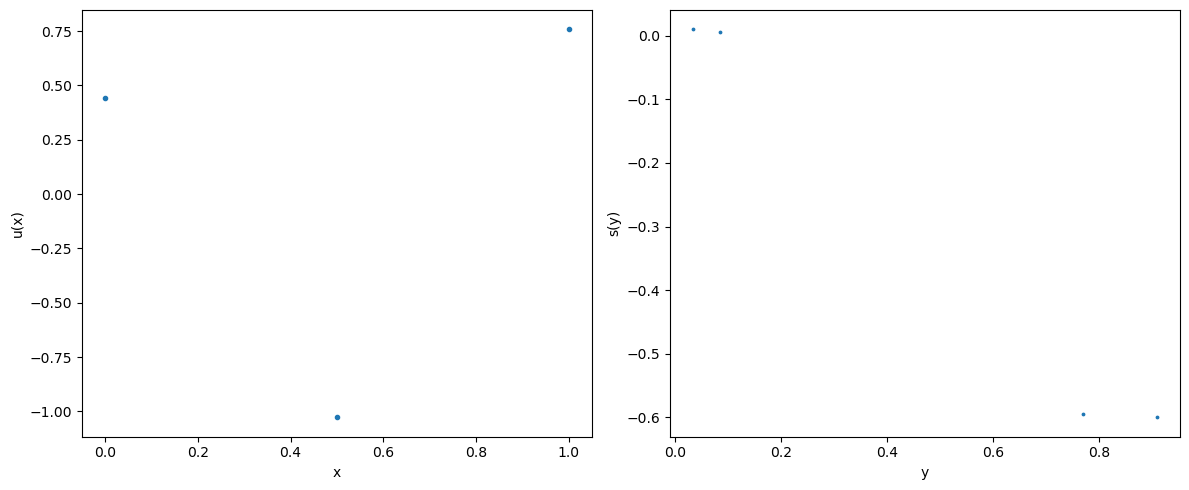

In [10]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(jnp.linspace(0, 1, m_train), u_train[0, :], 'o', markersize=3)
plt.xlabel('x')
plt.ylabel('u(x)')
plt.tight_layout()

plt.subplot(1,2,2)
plt.scatter(y_train[:P_train], s_train[:P_train], s=3)
plt.xlabel('y')
plt.ylabel('s(y)')
plt.tight_layout()
plt.show()

In [11]:
key_test = random.PRNGKey(0)
l_test = 0.2  # Length scale of a Gaussian random field (GRF)
N_test = 2    # Number of input samples in the training data-set
m_test = 50   # Number of locations for evaluating the input functions u
P_test = 100  # Number of locations for evaluating the output functions G(u)

u_test, y_test, s_test = \
    generate_test_data(key_test, l_test, N_test, m_test, P_test)

In [12]:
print(u_test.shape)  # (NxP, m)
print(y_test.shape)  # (NxP, 1)
print(s_test.shape)  # (NxP, 1)

(200, 50)
(200, 1)
(200, 1)


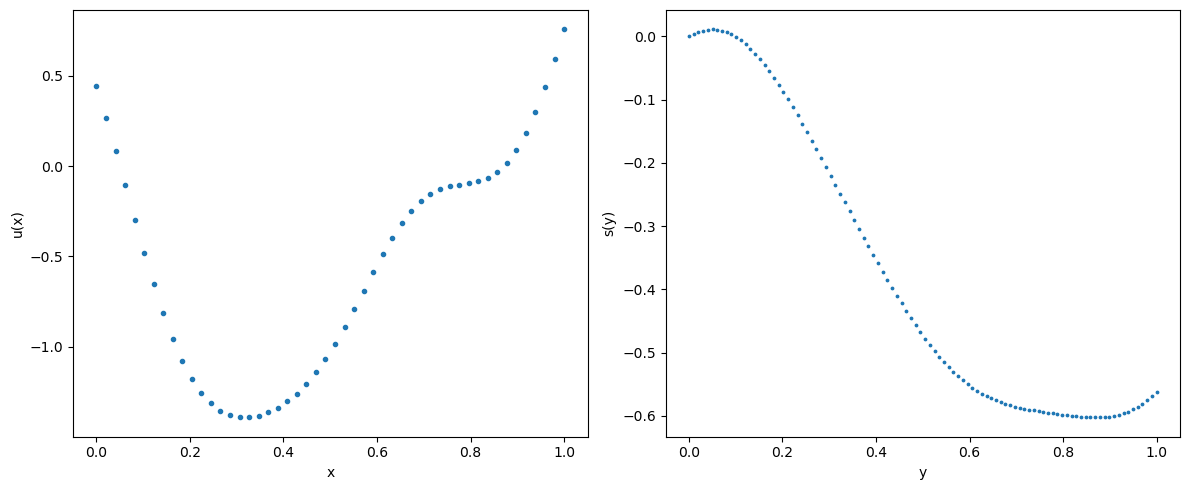

In [14]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(jnp.linspace(0, 1, m_test), u_test[0, :], 'o', markersize=3)
plt.xlabel('x')
plt.ylabel('u(x)')
plt.tight_layout()

plt.subplot(1,2,2)
plt.scatter(y_test[:P_test], s_test[:P_test], s=3)
plt.xlabel('y')
plt.ylabel('s(y)')
plt.tight_layout()
plt.show()